# Read the PDF

In [1]:
# libraries for text cleaning
%pip install nltk
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords as sw
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer

# library to read the PDF
%pip install pdfplumber
import pdfplumber

# convert date string to datetime format
from datetime import datetime

import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/henrytran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/henrytran/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/henrytran/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
# We should use this code
# this is the text extracted from the first 3 pages extracted from the
def raw_data_extraction(input_pdf):
    # take the pdf as an input and return the whole pdf as text
    raw_input=""
    with pdfplumber.open(input_pdf) as pdf:
        for page in pdf.pages:
            raw_input+=(page.extract_text() or "") + "\n"
    return raw_input

def article_extraction(raw_input):
    article=""
    details=""
    article_idx=0
    article_dict={}
    details_dict={}
    article_status=False # mark the start of the article
    details_status=False
    for row in raw_input.lower().split('\n'):
        if row=='full text':
            article_status=True
            article_idx+=1
            continue
        if article_status:
            if row=='details':
                article_status=False
                details_status=True
                article_dict[article_idx] = article
                article=""
                continue
            article+=row+" "
        if details_status:
            if row=='links':
                details_status=False
                details_dict[article_idx]=details
                details=""
                continue
            details+=row+'\n'
    return article_dict, details_dict

def clean_article(article):
    lemmatizer=WordNetLemmatizer()
    desc = re.sub(r'\([^)]*\)', '', article)
    sent_desc =sent_tokenize(desc)
    sww=set(sw.words())
    abstraction = []
    for sent in sent_desc:
        tokens = re.sub(r"[^a-z0-9]+", " ", sent.lower())
        words = word_tokenize(tokens)
        remaining_words = [word for word in words if word not in sww]
        if remaining_words:
            lemmatised_words=[]
            for word in remaining_words:
                lemmatised_word=lemmatizer.lemmatize(word)
                lemmatised_words.append(lemmatised_word)
            abstraction.append(lemmatised_words)
    final_doc=""
    for sent in abstraction[:-1]:
        for word in sent:
            final_doc+=word+" "
    return final_doc # remove the name of the writer

    # above for loop why is it --> for sent in abstraction[:-1]???? we lose the last sentence here right?

def clean_detail(detail):
    year=""
    date=""
    article_id=""
    for row in detail.split('\n'):
        if row.split(":")[0]=="proquest document id":
            article_id=row.split(":")[1].strip().split(" ")
            if len(article_id)>1:
                new_id=""
                for part in article_id:
                    new_id+=part
                article_id=[new_id]
            continue
        if row.split(":")[0]=="publication year":
            year = str(row.split(":")[1])
        if row.split(":")[0]=="publication date":
            raw_date=row.split(":")[1].split(",")[0]
            full_raw_date= raw_date + year
            format_date= " %b %d %Y"           
            date = datetime.strptime(full_raw_date, format_date)
    return date.date(), article_id
    

raw_input1=raw_data_extraction('3pages.pdf')
article1, details1=article_extraction(raw_input1)
doc1=clean_article(article1[1])
date1, article_id1=clean_detail(details1[1])

In [3]:
date1=clean_detail(details1[1])

In [4]:
print(article1[1]) # 1 article 1, 2 article 2, 3 article 3.

conservative economist erwin john "e.j." antoni sometimes jokes on social media that the "l" in bls is silent. president trump this week tapped antoni to run the bureau of labor statistics, the agency whose data and methodologies he has long criticized, especially when it produces numbers that trump doesn't like. antoni recently proposed suspending the monthly jobs report, one of the most important data releases for the economy and markets. on tuesday, a white house official noted that antoni made the comment before he knew he was going to be chosen and that his comments don't reflect official bls policy. if confirmed by the senate, antoni would run a 141-year-old agency staffed by around 2,000 economists, statisticians and other officials. the bls has a long record of independence and nonpartisanship that economists and investors say is critical to the credibility of u.s. economic data. according to a commencement program from northern illinois university, antoni earned a master's and

In [7]:
date1

datetime.date(2025, 8, 14)

# To find the unique words and count for the 222 articles

In [8]:
raw_input222 = raw_data_extraction('ProQuestDocuments-2025-08-16_1_fiscalpolicy_last12.pdf')
article222_dict, details222_dict = article_extraction(raw_input222)

#for key in article222_dict.keys():
 #   cleaned_article222 = clean_article(article222_dict[key])
 #   print(cleaned_article222)

In [9]:
all_tokens = []

for key, article in article222_dict.items():
    cleaned_article222 = clean_article(article)
    tokens = cleaned_article222.split()   # split cleaned string into words
    all_tokens.extend(tokens)

In [10]:
from collections import Counter
word_counts = Counter(all_tokens)

In [11]:
print("Number of unique words:", len(word_counts))
print("Top n... words:", word_counts.most_common(100))
#print("Count for 'tax':", word_counts['tax'])

Number of unique words: 11008
Top n... words: [('tax', 1199), ('trump', 1099), ('year', 918), ('cut', 698), ('republican', 556), ('house', 503), ('president', 480), ('tariff', 454), ('spending', 451), ('bill', 434), ('policy', 415), ('government', 414), ('budget', 371), ('china', 356), ('rate', 352), ('company', 352), ('fiscal', 337), ('1', 328), ('economic', 321), ('federal', 317), ('economy', 310), ('state', 309), ('billion', 298), ('deficit', 287), ('market', 284), ('plan', 280), ('price', 279), ('growth', 273), ('increase', 268), ('administration', 264), ('million', 261), ('senate', 259), ('trillion', 251), ('2', 242), ('country', 235), ('cost', 233), ('trade', 233), ('month', 229), ('higher', 227), ('debt', 223), ('000', 219), ('time', 218), ('inflation', 218), ('make', 216), ('term', 209), ('investor', 204), ('5', 202), ('program', 201), ('bank', 201), ('4', 198), ('official', 196), ('day', 196), ('change', 195), ('week', 194), ('income', 193), ('dollar', 193), ('security', 193),

# bigrams

In [12]:
from nltk.util import ngrams
from collections import Counter

bigram_counts = Counter()

for article in article222_dict.values():
    cleaned = clean_article(article)     # your existing cleaner
    tokens = cleaned.split()             # turn string into list of words
    bigrams = [" ".join(bg) for bg in ngrams(tokens, 2)]
    bigram_counts.update(bigrams)


In [13]:
top_100_bigrams = bigram_counts.most_common(100)

for phrase, count in top_100_bigrams:
    print(f"{phrase}: {count}")

tax cut: 335
white house: 146
president trump: 125
spending cut: 120
interest rate: 109
trump administration: 99
fiscal year: 86
budget deficit: 86
wall street: 78
social security: 75
donald trump: 72
economic growth: 69
tax credit: 67
enlarge image: 62
house republican: 60
5 trillion: 59
state local: 52
central bank: 51
tax rate: 51
vice president: 50
10 year: 49
2017 tax: 46
chief executive: 45
real estate: 45
president elect: 45
federal reserve: 44
tax increase: 44
budget committee: 43
local tax: 41
federal government: 39
biden administration: 38
senate republican: 36
treasury yield: 36
year ago: 35
p 500: 35
tax tip: 35
expiring tax: 35
local government: 35
street journal: 34
trump tariff: 34
income tax: 34
security benefit: 34
house senate: 33
percentage point: 33
president biden: 33
1 5: 32
4 trillion: 32
clean energy: 32
trump term: 31
former president: 31
long term: 31
tax spending: 31
border security: 31
tax bill: 31
billion dollar: 31
fiscal policy: 30
10 000: 30
longer term:

# Create the set of fiscal policy related words

In [14]:

# the set of recurring words in these articles related to fiscal policy
fiscal_terms=['tariffs', 'tax cuts', 'budget deficits', 'presidents', 'fiscal policy', 'political campaigns', 'federal budget', 'economic growth', 'interest rates',
                'tax increases', 'gross domestic' , 'income taxes', 'international relations-us', 'profits', 'stock exchanges', 'supply chains', 'tax refunds','product-gdp', 'tax rates', 'economists', 'government spending', 'investments', 'voters', 'inflation', 'legislators', 'taxes',
                'federal reserve monetory policy', 'investors', 'presidential elections', 'congressional committees', 'borrowing', 'central banks', 'immigration policy', 
                'international trade', 'economic conditions', 'legislation', 'american dollar', 'social security', 'dow jones averages', 'pandemics', 'treasuries', 'costs',
                'funding', 'manufacturing', 'political leadership', 'clean technology', 'national debt', 'national security', 'stocks', 'exports', 'immigrants',
                'leadership', 'medicare', 'political parties', 'prime ministers', 'scandals', 'tax credits', 'trade policy', 'border security', 'consumer price index',
                'defense spending', 'economic impact', 'economic policy', 'employees', 'federal legislation', 'households', 'immigration', 'international relations', 'low income groups',
                'prices', 'social networks', 'tax legislation', 'trade disputes', 'budgets', 'consumers', 'corporate profits', 'currency', 'deportation', 
                'infrastructure', 'international economic relations', 'nominations', 'nvidia corp', 'polls & surveys', 'provisions', 'recessions', 'securities markets',
                'trade relations', 'bond markets', 'cities', 'consumptions', 'cost control', 'decision making', 'deficit financing', 'economic crisis', 'economic development enforcement', 
                'factories', 'federal funding', 'global economy', 'government bonds']

In [43]:
# group all terms into groups
terms_categories={'tax': ['tax cuts','tax increases', 'tax rates', 'tax credits', 'taxes', 'tax legislation', 'income taxes', 'tax refunds', 'corporate profits', 'profits'],
                'tariffs_trade': ['tariffs', 'trade policy', 'trade disputes','international trade','trade relations', 'exports','supply chains', 'border security', 'international relations-us', 'international relations', 'immigration policy', 'immigrants', 'immigration', 'deportation'],
                'budget_debt': ['budget deficits', 'federal budget', 'budgets', 'deficit financing', 'national debt', 'treasuries', 'borrowing', 'federal funding', 'funding', 'cost control', 'costs', 'investments', 'provisions'],
                'spending_social_program': ['government spending', 'defense spending', 'infrastructure', 'social security', 'medicare', 'federal legislation', 'households', 'low income groups', 'national security', 'pandemics', 'manufacturing'],
                'monetary_financial_policy': ['government bonds', 'bond markets', 'federal reserve monetory policy', 'central banks', 'stocks', 'stock exchanges', 'dow jones averages','american dollar', 'currency', 'securities markets', 'fiscal policy', 'interest rates', 'inflation', 'consumer price index', 'prices', 'recessions', 'enforcement'],
                'economy': ['economists', 'economic growth', 'economic conditions', 'economic policy', 'economic impact', 'international economic relations', 'global economy', 'economic crisis', 'economic development', 'gross domestic product-gdp', 'economic development enforcement'],
                'other_context': ['presidents', 'investors', 'political campaigns', 'political leadership', 'political parties', 'legislation','congressional committees','prime ministers','scandals','nominations', 'clean technology', 'cities', 'voters', 'legislators', 'leadership', 'consumers', 'social networks', 'presidential elections', 'nvidia corp', 'polls & surveys', 'consumptions', 'decision making','employees', 'factories']}
                #'america': ['america', 'united states of america', 'usa', 'u.s.a.', 'u.s', 'the states', 'united states']}

# Match the terms and categories with the documents

In [33]:
# this for the list of fiscal_terms (not categories)
# lemmatizing the set of fiscal words so they match the lemmatized articles
def lemmatize_string(string, lemmatizer):
    return " ".join(lemmatizer.lemmatize(w) for w in string.split())

lemmatizer = WordNetLemmatizer()
fiscal_terms_lemmatized = [lemmatize_string(term, lemmatizer) for term in fiscal_terms]

In [34]:
# match the fiscal terms to the document
def count_matching_words(terms_list, document):
    terms_count={}
    for term in terms_list:
        term_count=document.count(term)
        if term_count>0:
            terms_count[term]=term_count
    return terms_count

count_matching_words(fiscal_terms_lemmatized,doc1)


{'president': 5,
 'fiscal policy': 2,
 'interest rate': 1,
 'economist': 8,
 'inflation': 1,
 'tax': 1,
 'investor': 1,
 'cost': 1,
 'consumer price index': 1,
 'price': 1,
 'consumer': 1}

In [48]:
# this for the categoires of fiscal_terms (not list)
# lemmatizing the set of fiscal words so they match the lemmatized articles
def lemmatize_categories(categories, lemmatizer):
    lemmatized = {}
    for key, terms in categories.items():
        lemmatized[key] = [lemmatize_string(term, lemmatizer) for term in terms]
    return lemmatized

lemmatizer = WordNetLemmatizer()
terms_categories_lemmatized = lemmatize_categories(terms_categories, lemmatizer) # keep this

In [49]:
# match the fiscal term groups to the document
def count_matching_category(terms_categories, document):
    # this function will count number of terms in fiscal policy categories and classified whether a new is fical_policy related or not
    terms_list=[word for category in terms_categories.values() for word in category]
    terms_count={}
    is_fiscal=False
    for term in terms_list:
        term_count=document.count(term)
        if term_count>0:
            for key in terms_categories.keys():
                if term in terms_categories[key]:
                    terms_count[key]=terms_count.get(key,0)+term_count
    if len(terms_count.keys())>=3: #and 'america' in terms_count.keys()
        is_fiscal=True
    return terms_count, is_fiscal # return the boolean values for terms_count.keys()>=3

terms_count, is_fiscal=count_matching_category(terms_categories_lemmatized,doc1)
terms_count, is_fiscal

({'tax': 1,
  'budget_debt': 1,
  'monetary_financial_policy': 6,
  'economy': 8,
  'other_context': 7},
 True)

# TODO: 
- We need at least one word related to debt, tax and tariff
- Doing a dataframe:
    + article title
    + date
    + is_fiscal: 0 or 1


# Make the dataframe to store the data

In [50]:
def full_pipeline(input_pdf):
    raw_input=raw_data_extraction(input_pdf)
    article_dict, details_dict = article_extraction(raw_input)
    column_names =['article_id', 'date', 'is_fiscal_article']
    fiscal_articles_df=pd.DataFrame(columns=column_names)
    for key in article_dict.keys():
        cleaned_article=clean_article(article_dict[key])
        date, article_id=clean_detail(details_dict[key])
        number_matching_words = count_matching_words(terms_categories_lemmatized, cleaned_article)
        number_matching_terms, is_fiscal=count_matching_category(terms_categories_lemmatized,cleaned_article)
        if article_id not in fiscal_articles_df['article_id'].values: # checked for duplicated articles
            fiscal_articles_df.loc[key]=[article_id[0], date, is_fiscal]
    return fiscal_articles_df

full_pipeline('21pages.pdf')    
    

,article_id,date,is_fiscal_article
1,3239236707,2025-08-14,True
2,3238853083,2025-08-13,True
3,3238849695,2025-08-13,True
4,3237878296,2025-08-09,True


In [51]:
full_pipeline("ProQuestDocuments-2025-08-16_1_fiscalpolicy_last12.pdf").to_csv("fiscal_articles.csv")

# Fiscal Index Calculation

In [52]:
fiscal_article_df=pd.read_csv("fiscal_articles.csv")

In [53]:
# sorted the data from oldest to latest
fiscal_article_df = fiscal_article_df.sort_values(by='date', ascending=True)

In [54]:
fiscal_article_df

,Unnamed: 0,article_id,date,is_fiscal_article
221,222,3093027041,2024-08-15,True
220,221,3093378089,2024-08-16,True
219,220,3094633204,2024-08-20,True
218,219,3095348612,2024-08-22,True
217,218,3097659684,2024-08-28,True
...,...,...,...,...
4,5,3237867670,2025-08-09,True
3,4,3237878296,2025-08-09,True
2,3,3238849695,2025-08-13,True
1,2,3238853083,2025-08-13,True


In [56]:
# count number of fiscal articles per day
fiscal_policy_index=fiscal_article_df[['date', 'is_fiscal_article']].groupby(by="date").sum().reset_index()
#fiscal_policy_index=fiscal_article_df['date'].

In [57]:
fiscal_policy_index['date']

0      2024-08-15
1      2024-08-16
2      2024-08-20
3      2024-08-22
4      2024-08-28
          ...    
150    2025-08-06
151    2025-08-08
152    2025-08-09
153    2025-08-13
154    2025-08-14
Name: date, Length: 155, dtype: object

In [69]:
# rate of fiscle articles per day
# for now, it is assumed that the number of articles per day published by WSJ is 240
fiscal_policy_index['rate']=round(fiscal_policy_index['is_fiscal_article']/240,4)

In [70]:
# calculate the base mean
average_rate=fiscal_policy_index['rate'].mean()

In [71]:
# calculate the fiscal policy index
fiscal_policy_index["fiscal_policy_index"]=round((fiscal_policy_index['rate']/average_rate)*100,4)

<Axes: xlabel='date'>

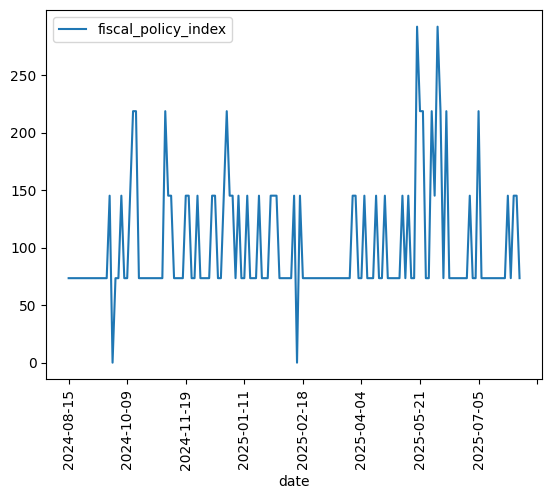

In [74]:
fiscal_policy_index.plot(x='date', y='fiscal_policy_index', yticks=range(0,300,50), kind='line', rot=90)

In [75]:
# checking fiscal policy data frame
fiscal_policy_index.head(50)

,date,is_fiscal_article,rate,fiscal_policy_index
0,2024-08-15,1,0.0042,73.4846
1,2024-08-16,1,0.0042,73.4846
2,2024-08-20,1,0.0042,73.4846
3,2024-08-22,1,0.0042,73.4846
4,2024-08-28,1,0.0042,73.4846
5,2024-09-03,1,0.0042,73.4846
6,2024-09-06,1,0.0042,73.4846
7,2024-09-10,1,0.0042,73.4846
8,2024-09-13,1,0.0042,73.4846
9,2024-09-14,1,0.0042,73.4846


In [76]:
# checking how many fiscal articles - this should be 222 of 222 articles
print(fiscal_policy_index['is_fiscal_article'].sum())

212


# This is a new changes